## Search for nearby Amenities for all site locations of each city
    List of Amenities by Categories:
    Categories: 
    A. Emergency Facilities 
       '''How accesible are these facilities in case of mass emergency on/around 
          sites for containing the situation and resuming business asap''' 
          
       1. Hospital
       2. Fire Station
       3. Doctor
       
    B. Accomodation 
       '''Many executive employees travel from outside the city for fews days a week and might need lodging
          facility as close to the company as possible. Also lot of local/not-local employees use vehicle
          for commute and will need parking nearby'''
          
       1. Lodging
       2. Parking
       
    C. Refreshment 
        '''Refeshment such as restaurants and cafes around site'''  
           
       1. Cafe/Restaurants
       
    D. Basic Errands/appointments
        '''By large employees tend to take care of daily errands and appoinments in lunch breaks or before/after
           work hours and prefer it to be as close to work as possible for obvious reasons''' 
           
       1. Super markets
       2. Post Office
       3. Doctor
       
    E. Fitness
        '''Fitness is top on priority list for a significant amount of employees now a days may be in gym or a 
           jog/walk in park.'''
           
       1. Gym

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
refreshments = {'Chicago': 8, 'Boston': 7, 'Atlanta': 6, 'Washington DC': 5, 'Raleigh': 4, 
                'New York': 3, 'Los Angeles': 2, 'Austin': 1}
accomodation = {'Chicago': 7, 'New York': 8, 'Boston': 6, 'Austin': 5, 'Atlanta': 2, 
                'Raleigh': 4, 'Los Angeles': 3, 'Washington DC': 1}
crime =        {'Atlanta':8, 'Washington DC':7, 'Austin':6, 'Chicago':5, 'Raleigh':4,
                'Boston':3, 'Los Angeles':2, 'New York':1}
emergency =    {'Chicago': 7, 'New York': 8, 'Boston': 6, 'Washington DC': 5, 'Austin': 1,
                'Atlanta': 3, 'Los Angeles': 4, 'Raleigh': 2}
errands =      {'Chicago': 6, 'New York': 7, 'Boston': 8, 'Washington DC': 5, 'Atlanta': 3, 'Austin': 2,
                'Los Angeles': 4, 'Raleigh': 1}
fitness =      {'Chicago': 7, 'New York': 8, 'Boston': 6, 'Washington DC': 5, 'Austin': 3,
                'Los Angeles': 4, 'Atlanta': 1, 'Raleigh': 2}


In [3]:
amenities_ranking = {'City Name':          ['Chicago city, Illinois','Boston city, Massachusetts',
                                            'Atlanta city, Georgia','Washington city, District of Columbia DC',
                                            'Raleigh city, North Carolina','New York city, New York',
                                            'Los Angeles city, California','Austin city, Texas'],
                    'Refreshments':        [8,7,6,5,4,3,2,1],
                    'Accomodations':       [7,6,2,1,4,8,3,5],
                    'Crime Rate':          [5,3,8,7,4,1,2,6],
                    'Emergency':           [7,6,3,5,2,8,4,1],
                    'Errands':             [6,8,3,5,1,7,4,2],
                    'Fitness':             [7,6,1,5,2,8,4,3]}

In [4]:
amenities_ranking_df = pd.DataFrame(amenities_ranking)
amenities_ranking_df = amenities_ranking_df[['City Name','Refreshments','Accomodations',
                                            'Emergency','Errands','Fitness',
                                            'Crime Rate']]
amenities_ranking_df['Total Score'] = amenities_ranking_df.sum(axis=1)
amenities_ranking_df

,City Name,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate,Total Score
0,"Chicago city, Illinois",8,7,7,6,7,5,40
1,"Boston city, Massachusetts",7,6,6,8,6,3,36
2,"Atlanta city, Georgia",6,2,3,3,1,8,23
3,"Washington city, District of Columbia DC",5,1,5,5,5,7,28
4,"Raleigh city, North Carolina",4,4,2,1,2,4,17
5,"New York city, New York",3,8,8,7,8,1,35
6,"Los Angeles city, California",2,3,4,4,4,2,19
7,"Austin city, Texas",1,5,1,2,3,6,18


In [5]:
# Sort by total score
amenities_ranking_df = amenities_ranking_df.sort_values('Total Score')[::-1]
amenities_ranking_df = amenities_ranking_df.reset_index(drop=True)
rank = [1,2,3,4,5,6,7,8]

amenities_ranking_df['Final Rank'] =  rank
amenities_ranking_df

,City Name,Refreshments,Accomodations,Emergency,Errands,Fitness,Crime Rate,Total Score,Final Rank
0,"Chicago city, Illinois",8,7,7,6,7,5,40,1
1,"Boston city, Massachusetts",7,6,6,8,6,3,36,2
2,"New York city, New York",3,8,8,7,8,1,35,3
3,"Washington city, District of Columbia DC",5,1,5,5,5,7,28,4
4,"Atlanta city, Georgia",6,2,3,3,1,8,23,5
5,"Los Angeles city, California",2,3,4,4,4,2,19,6
6,"Austin city, Texas",1,5,1,2,3,6,18,7
7,"Raleigh city, North Carolina",4,4,2,1,2,4,17,8


In [6]:
amenities_ranking_df.to_csv("../Results/Final City Ranking for Amenities.csv")

In [28]:
amenity_score = [35,40,36,28,17,23,19,18]
#Get walk score
walk_score = pd.read_csv('../Results/Walk Bike Transit Score Ranking.csv')
walk_score = walk_score[['Amazon City','Walk score']]
walk_score['Walk score'] = round(walk_score['Walk score'].astype(float))
walk_score['Amenity Score']=amenity_score
walk_score

,Amazon City,Walk score,Amenity Score
0,New York,86.0,35
1,Chicago,76.0,40
2,Boston,70.0,36
3,Washington DC,54.0,28
4,Raleigh,33.0,17
5,Atlanta,54.0,23
6,Los Angeles,49.0,19
7,Austin,30.0,18


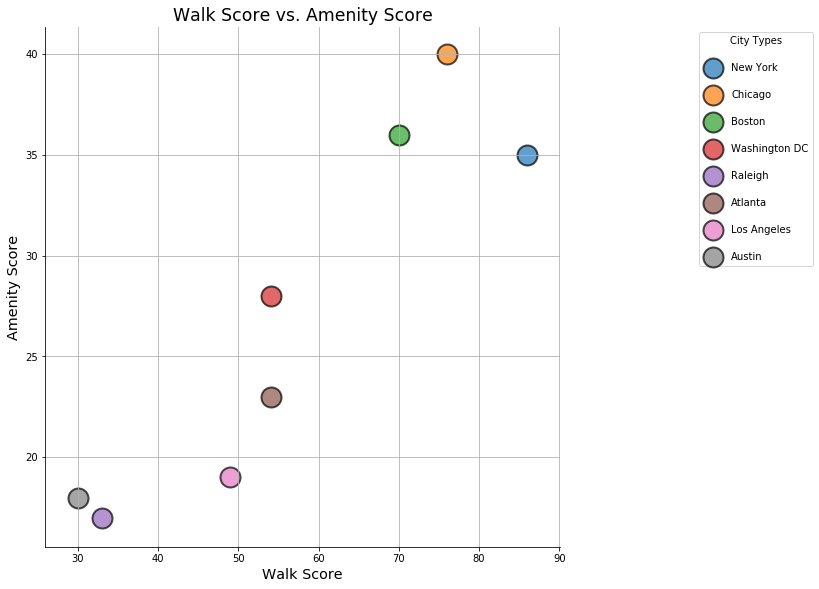

In [47]:
# Use seaborn to make the scatter plot
sns.lmplot(x='Walk score', y='Amenity Score', data=walk_score, fit_reg=False, hue='Amazon City', 
           legend=False, size=8,
           scatter_kws={"s":400, 'alpha':0.7, 'edgecolors':'black', 'linewidths':2})
# Make the grid, set x-limit and y-limit
plt.grid()
# plt.xlim(65,100)
# plt.ylim(10,70)

# Make x-axis, y-axis & title labels
plt.title("Walk Score vs. Amenity Score", fontsize="xx-large")
plt.xlabel("Walk Score", fontsize="x-large")
plt.ylabel("Amenity Score", fontsize="x-large")

# Format the legend and plot
plt.legend(loc='upper right', title='City Types', bbox_to_anchor=(1.5,1), labelspacing=1.7)

plt.savefig('Save_Figs/walkscore_vs_amenityscore.png', bbox_inches='tight')
plt.show()